# Example 1-1. Training and running a linear model using Scikit-Learn
<https://github.com/htnminh/handson-ml2-notebooks>

## Data sources
- <https://www.kaggle.com/jej13b/oecd-better-life-index>
- <https://data.worldbank.org/indicator/NY.GDP.PCAP.CD>


## Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Change dir

In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/Hands-on Machine Learning 2/handson-ml2-notebooks/files/Chapter 1/Example 1-1"

/content/drive/MyDrive/Colab Notebooks/Hands-on Machine Learning 2/handson-ml2-notebooks/files/Chapter 1/Example 1-1


In [3]:
!ls

 API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv   OECDBLI2017cleanedcsv.csv
'Example 1-1.ipynb'


# Inspect some first lines of each file

In [4]:
file_names = {'GDP': 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv',
              'life_satisfaction': 'OECDBLI2017cleanedcsv.csv'
             }

for file_name in file_names.values():
    print('-----------------------------------------------------')
    print(file_name)
    print('-----------------------------------------------------')
    with open(file_name, 'r') as file_handler:
        print('\n'.join(file_handler.read().splitlines()[:10]))

-----------------------------------------------------
API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv
-----------------------------------------------------
﻿"Data Source","World Development Indicators",

"Last Updated Date","2021-09-15",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",
"Aruba","ABW","GDP per capita (current US$)","NY.GDP.PCAP.CD","","","","","","","","","","","","","","","","","","","","","","","","","","","6472.39870887477","7885.15892730063","9765.90920740626","11392.2691499861","12306.7176791493","13495.79430054","14045.4745656146","

# Import packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics

In [6]:
'''
Respectively:

Python 3.7.12
1.19.5
1.1.5
3.2.2
0.22.2.post1
'''

!python --version
print(np.__version__)
print(pd.__version__)

import matplotlib as mpl
print(mpl.__version__)
del mpl

import sklearn as sk
print(sk.__version__)
del sk

Python 3.7.12
1.19.5
1.1.5
3.2.2
0.22.2.post1


# Load data

## `life_satisfaction` file

### Read csv

In [7]:
life_satisfaction = pd.read_csv(file_names['life_satisfaction'])
life_satisfaction.head()

,Country,Dwellings without basic facilities as pct,Housing expenditure as pct,Rooms per person as rat,Household net adjusted disposable income in usd,Household net financial wealth in usd,Labour market insecurity as pct,Employment rate as pct,Long-term unemployment rate as pct,Personal earnings in usd,Quality of support network as pct,Educational attainment as pct,Student skills as avg score,Years in education in yrs,Air pollution in ugm3,Water quality as pct,Stakeholder engagement for developing regulations as avg score,Voter turnout as pct,Life expectancy in yrs,Self-reported health as pct,Life satisfaction as avg score,Feeling safe walking alone at night as pct,Homicide rate as rat,Employees working very long hours as pct,Time devoted to leisure and personal care in hrs
0,Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,94,80,502,21.2,5,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35
1,Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,92,85,492,17.1,16,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55
2,Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,92,75,503,18.2,15,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77
3,Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,93,91,523,16.7,7,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41
4,Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,84,65,443,17.3,16,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90


##

### Info

In [8]:
life_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         39 non-null     object 
 1   Dwellings without basic facilities as pct                       39 non-null     float64
 2   Housing expenditure as pct                                      39 non-null     int64  
 3   Rooms per person as rat                                         39 non-null     float64
 4   Household net adjusted disposable income in usd                 39 non-null     int64  
 5   Household net financial wealth in usd                           39 non-null     int64  
 6   Labour market insecurity as pct                                 39 non-null     float64
 7   Employment rate as pct                                 

### Slice and rename

In [9]:
life_satisfaction = life_satisfaction[['Country', 'Life satisfaction as avg score']]
life_satisfaction = life_satisfaction.rename(
    columns={'Life satisfaction as avg score':'Life satisfaction'})
life_satisfaction.head()

,Country,Life satisfaction
0,Australia,7.3
1,Austria,7.0
2,Belgium,6.9
3,Canada,7.3
4,Chile,6.7


### Set index and review info

In [10]:
life_satisfaction = life_satisfaction.set_index(keys='Country')
life_satisfaction.head()

,Life satisfaction
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Chile,6.7


In [11]:
life_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Australia to South Africa
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life satisfaction  39 non-null     float64
dtypes: float64(1)
memory usage: 624.0+ bytes


## `GDP` file

### Read csv

In [12]:
gdp = pd.read_csv(file_names['GDP'], header=2)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.450369,146.853701,156.017929,182.044085,162.169577,180.017301,190.636220,192.126267,203.783404,227.658711,236.533779,253.728448,267.837319,339.387247,409.668542,424.337380,411.062391,455.753899,495.546623,563.384517,687.800393,684.453945,641.080148,643.097824,570.820525,495.121129,541.833347,643.095686,656.626462,656.465746,696.223892,703.654678,682.586851,665.242926,659.589902,722.169716,701.734197,718.854278,660.471966,635.143368,672.205474,591.088444,589.206824,757.449759,916.603367,1037.727057,1142.955902,1278.971341,1356.529948,1326.251549,1550.121225,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,143.757635,195.490684,169.168529,200.226910,241.782075,333.289875,377.898463,444.504298,454.923088,482.618500,584.544785,718.901922,1317.316549,1136.794683,816.139286,656.904776,651.700457,585.078292,584.290054,561.525598,510.568346,594.899600,558.599040,547.823071,438.262311,376.354921,459.364903,495.779036,486.523016,484.090742,500.436180,502.031662,516.927934,605.061007,681.882359,826.816538,988.839394,1224.057612,1400.086007,1666.899847,1444.201899,1655.130138,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,NaN,NaN,NaN,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869,NaN


### Info

In [13]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            146 non-null    float64
 10  1966            150 non-null    float64
 11  1967            154 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            166 non-null    float64
 15  1971            168 non-null    float64
 16  1972            168 non-null    float64
 17  1973            168 non-null    flo

### Slice and rename

In [14]:
gdp = gdp[['Country Name', '2017']]
gdp = gdp.rename(columns={'Country Name':'Country', '2017':'GDP'})
gdp.head()

,Country,GDP
0,Aruba,29350.805019
1,Africa Eastern and Southern,1536.206783
2,Afghanistan,519.888913
3,Africa Western and Central,1606.978332
4,Angola,4095.810057


### Set index and review info

In [15]:
gdp = gdp.set_index(keys='Country')
gdp.head()

,GDP
Country,
Aruba,29350.805019
Africa Eastern and Southern,1536.206783
Afghanistan,519.888913
Africa Western and Central,1606.978332
Angola,4095.810057


In [16]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     254 non-null    float64
dtypes: float64(1)
memory usage: 4.2+ KB


## Merge

### Merge

In [17]:
df = pd.concat([life_satisfaction, gdp], axis=1)
df

,Life satisfaction,GDP
Australia,7.3,54027.966818
Austria,7.0,47309.366274
Belgium,6.9,44089.310088
Canada,7.3,45129.356440
Chile,6.7,14998.817056
...,...,...
Samoa,NaN,4259.634172
Kosovo,NaN,4045.614209
"Yemen, Rep.",NaN,960.528848
Zambia,NaN,1535.196574


### Drop NaN and review info

In [18]:
df = df.dropna()
df.head()

,Life satisfaction,GDP
Australia,7.3,54027.966818
Austria,7.0,47309.366274
Belgium,6.9,44089.310088
Canada,7.3,45129.356440
Chile,6.7,14998.817056


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Australia to South Africa
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life satisfaction  35 non-null     float64
 1   GDP                35 non-null     float64
dtypes: float64(2)
memory usage: 840.0+ bytes


# Prepare data

In [20]:
X = df['GDP']
X.head()

Australia    54027.966818
Austria      47309.366274
Belgium      44089.310088
Canada       45129.356440
Chile        14998.817056
Name: GDP, dtype: float64

In [21]:
y = df['Life satisfaction']
y.head()

Australia    7.3
Austria      7.0
Belgium      6.9
Canada       7.3
Chile        6.7
Name: Life satisfaction, dtype: float64

# Visualize data

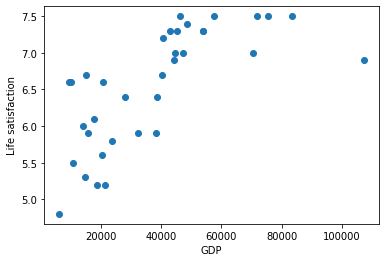

In [22]:
plt.xlabel('GDP')
plt.ylabel('Life satisfaction')
plt.scatter(X, y)
plt.show()

# Select and train a linear model

## Prepare data to feed

In [23]:
X = X.to_numpy()
X = X[:, np.newaxis]
print(X[:5])

y = y.to_numpy()
y = y[:, np.newaxis]
print(y[:5])

[[54027.96681846]
 [47309.36627353]
 [44089.31008751]
 [45129.35643957]
 [14998.81705632]]
[[7.3]
 [7. ]
 [6.9]
 [7.3]
 [6.7]]


## Train model

In [24]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model info

In [25]:
print('Coefficients:', model.coef_)
print('y-intercept:', model.intercept_)

Coefficients: [[2.34509699e-05]]
y-intercept: [5.66149057]


# Predict values and visualize model

## Predict values

In [26]:
y_predict = model.predict(X)
print(y_predict[:5])

[[6.92849879]
 [6.77094109]
 [6.69542765]
 [6.71981775]
 [6.01322738]]


## Visualize model

Approximately,
Life satisfaction = 5.66149057232634 + 2.3450969850920823e-05 * GDP

Mean squared error: 0.30902792700373866
Root mean squared error: 0.5559028035580849



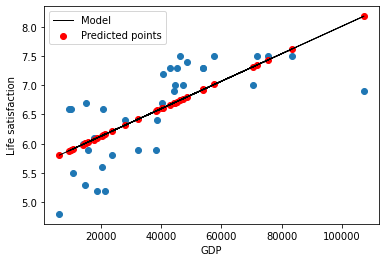

In [27]:
print('Approximately,\nLife satisfaction = %s + %s * GDP' % (
                        model.intercept_[0], model.coef_[0][0]
))
print('\nMean squared error:', sklearn.metrics.mean_squared_error(y, y_predict))
print('Root mean squared error:',
      sklearn.metrics.mean_squared_error(y, y_predict, squared=False))
print()

plt.xlabel('GDP')
plt.ylabel('Life satisfaction')
plt.scatter(X, y)

plt.scatter(X, y_predict, 
            color='red', label='Predicted points')
plt.plot(X, y_predict, linewidth=1, 
         color='black', label='Model')

plt.legend()
plt.show()

# Appendix

## Mean squared error

$MSE = \frac{1}{n} \Sigma_{i=1}^{n} (Y_i - \hat{Y_i})^2 $

where
- $MSE$: Mean squared error
- $n$: Number of data points
- $Y_i$: Observed values
- $\hat{Y_i}$: Predicted values

## Root mean squared error
$ RMSE = \sqrt{MSE}$

where
- $RMSE$: Root mean squared error
- $MSE$: Mean squared error